In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error, r2_score
from collections import Counter

import statsmodels.api as sm

In [7]:
# cal = pd.read_csv('calendar.csv.gz')
# listd = pd.read_csv('listings.csv.gz')
# lists = pd.read_csv('listings.csv')
# revs = pd.read_csv('reviews.csv.gz')
# nhood = pd.read_csv('neighbourhoods.csv')
purelst = pd.read_csv('listings.csv.gz')

In [8]:
# pd.set_option('display.max_colu?mns', 96)
pd.set_option('display.max_rows', 96)

In [9]:
import pickle
X_train= pd.read_pickle('pkls/rand_split/X_train.pkl')
y_train= pd.read_pickle('pkls/rand_split/y_train.pkl')
X_test= pd.read_pickle('pkls/rand_split/X_test.pkl')
y_test= pd.read_pickle('pkls/rand_split/y_test.pkl')

In [10]:
def my_metric(y_act,y_pred):
    r2_score= (1 - ((y_act-y_pred) ** 2).sum() / ((y_act-y_act.mean())**2).sum() )
#     print("My R2Score = ",r2_score)
    return(r2_score)

# Random Forest Model

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

<BarContainer object of 49 artists>

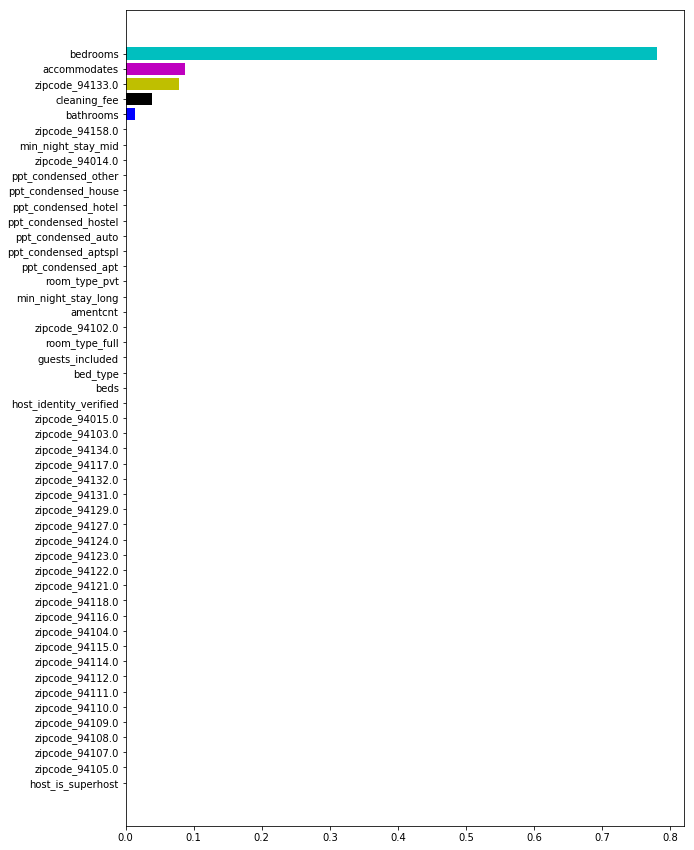

In [76]:
featurelist=X_train.columns
featureimp= regr.feature_importances_

tmp_df=featurelist.to_frame(index=False)
tmp_df=tmp_df.rename(columns={0:'feature'})
tmp_df['prime']=featureimp
feature_df=tmp_df.sort_values(by=['prime'], ascending=True)

fig=plt.figure(figsize=(10,15))
ax1=fig.add_subplot(111)
ax1.barh(feature_df['feature'],feature_df['prime'],color='rgbkymc')

In [17]:
print(regr.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

[148.7608447]


In [19]:
y_pred=regr.predict(X_test)

rf_score=regr.score(X_test,y_test)
print("Random Forest Score",rf_score)

#Calculate the baseline errors
baseline = abs(y_test.mean()-y_test)
print("Baseline Absolute Error",np.mean(baseline))

#Calculate the absolute errors
residuals = abs(y_pred-y_test)
print("Mean Absolute Error",np.mean(residuals))

#Calculate Mean Absolute pct error
mape = (residuals/y_test)*100

#Accuracy 
accy=100-np.mean(mape)

#Mean Absolute Error 

print("Accuracy",round(accy,2), '%')

print("My R2 Score is : ",my_metric(y_test,y_pred))

Random Forest Score 0.26934031349840093
Baseline Absolute Error 118.54777257380623
Mean Absolute Error 85.20770644659292
Accuracy 49.82 %
My R2 Score is :  0.26934031349840093


In [20]:
y_pred

array([148.7608447 , 148.7608447 , 464.85057917, 880.28985158,
       148.7608447 , 464.85057917, 178.69274618, 244.00004929,
       148.7608447 , 158.13211165, 492.25455561, 264.56068382,
       464.85057917, 148.7608447 , 148.7608447 , 264.56068382,
       264.56068382, 178.69274618, 148.7608447 , 178.69274618,
       264.56068382, 464.85057917, 148.7608447 , 148.7608447 ,
       148.7608447 , 264.56068382, 148.7608447 , 148.7608447 ,
       264.56068382, 148.7608447 , 148.7608447 , 632.14081022,
       148.7608447 , 148.7608447 , 178.69274618, 464.85057917,
       148.7608447 , 148.7608447 , 148.7608447 , 148.7608447 ,
       148.7608447 , 464.85057917, 148.7608447 , 148.7608447 ,
       178.69274618, 264.56068382, 264.56068382, 158.13211165,
       158.13211165, 148.7608447 , 264.56068382, 148.7608447 ,
       148.7608447 , 264.56068382, 264.56068382, 148.7608447 ,
       148.7608447 , 264.56068382, 178.69274618, 148.7608447 ,
       264.56068382, 148.7608447 , 148.7608447 , 264.56

In [21]:
#Building Residual DF

# dfpred= y_test.to_frame()
dfpred = pd.DataFrame()
dfpred['price'] = y_test
dfpred['rf_preds'] = y_pred
dfpred['rf_resid'] = dfpred.rf_preds-dfpred.price
dfpred['rf_residpct'] = (dfpred.rf_preds-dfpred.price)/dfpred.price
dfpred.head()

,price,rf_preds,rf_resid,rf_residpct
4327,200.0,148.760845,-51.239155,-0.256196
2326,140.0,148.760845,8.760845,0.062577
3190,780.0,464.850579,-315.149421,-0.404038
1900,499.0,880.289852,381.289852,0.764108
1622,93.0,148.760845,55.760845,0.599579


In [22]:
dfpred[dfpred.price > 1000]

,price,rf_preds,rf_resid,rf_residpct
110,1200.0,492.254556,-707.745444,-0.589788
1179,1100.0,464.850579,-635.149421,-0.577409
3481,1968.0,632.140810,-1335.859190,-0.678790
707,1450.0,492.254556,-957.745444,-0.660514
1157,1200.0,264.560684,-935.439316,-0.779533
3693,4000.0,148.760845,-3851.239155,-0.962810
4275,1285.0,492.254556,-792.745444,-0.616923
687,1050.0,464.850579,-585.149421,-0.557285
1952,1285.0,464.850579,-820.149421,-0.638249
2103,1500.0,464.850579,-1035.149421,-0.690100


In [23]:
dfpred[dfpred.price < 100]

,price,rf_preds,rf_resid,rf_residpct
1622,93.0,148.760845,55.760845,0.599579
2008,99.0,158.132112,59.132112,0.597294
1365,65.0,148.760845,83.760845,1.288628
170,45.0,148.760845,103.760845,2.305797
2293,72.0,148.760845,76.760845,1.066123
2497,75.0,148.760845,73.760845,0.983478
1190,66.0,148.760845,82.760845,1.253952
802,50.0,148.760845,98.760845,1.975217
4128,79.0,148.760845,69.760845,0.883049
4149,79.0,148.760845,69.760845,0.883049


Text(0,0.5,'RESIDUAL PCT')

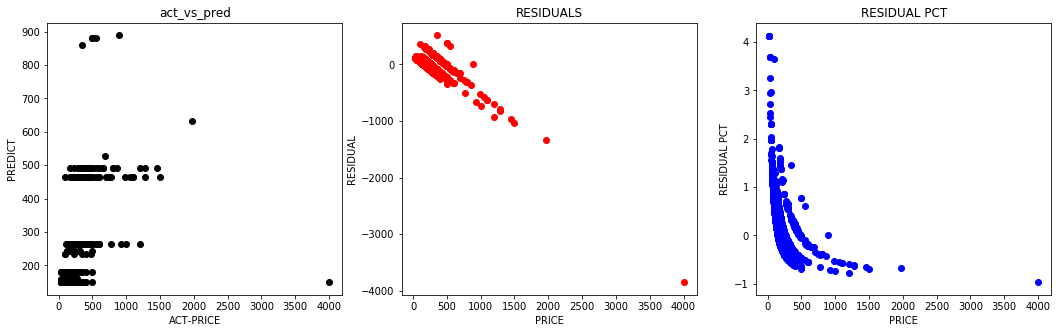

In [24]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.scatter(y_test, y_pred,  color='black')
ax1.set_title('act_vs_pred')
ax1.set_xlabel('ACT-PRICE')
ax1.set_ylabel('PREDICT')

ax2.scatter(dfpred.price,dfpred.rf_resid, color='red')
ax2.set_title('RESIDUALS')
ax2.set_xlabel('PRICE')
ax2.set_ylabel('RESIDUAL')

ax3.scatter(dfpred.price,dfpred.rf_residpct, color='blue')
ax3.set_title('RESIDUAL PCT')
ax3.set_xlabel('PRICE')
ax3.set_ylabel('RESIDUAL PCT')

# RANDOM FOREST TUNING

In [25]:
# Random Hyper Parameter Grid

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [26]:
print(random_grid)

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] bootstrap=True, n_estimators=400, max_features=sqrt, min_samples_split=5, max_depth=30, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=400, max_features=sqrt, min_samples_split=5, max_depth=30, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=400, max_features=sqrt, min_samples_split=5, max_depth=30, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=2000, max_features=sqrt, min_samples_split=5, max_depth=10, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=2000, max_features=sqrt, min_samples_split=5, max_depth=10, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=2000, max_features=sqrt, min_samples_split=5, max_depth=10, min_samples_leaf=1 
[CV] bootstrap=False, n_estimators=1200, max_features=sqrt, min_samples_split=5, max_depth=10, min_samples_leaf=2 
[CV] bootstrap=False, n_estimators=1200, max_features=sqrt, min_samples_split=5, max_depth=10, min_samples_leaf=2 
[CV]  bootstrap=True, n_es

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.5s


[CV]  bootstrap=False, n_estimators=1800, max_features=auto, min_samples_split=5, max_depth=10, min_samples_leaf=4, total=  16.0s
[CV] bootstrap=False, n_estimators=800, max_features=sqrt, min_samples_split=5, max_depth=90, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=1000, max_features=auto, min_samples_split=2, max_depth=50, min_samples_leaf=1, total=  19.3s
[CV] bootstrap=False, n_estimators=800, max_features=sqrt, min_samples_split=5, max_depth=90, min_samples_leaf=1 
[CV]  bootstrap=True, n_estimators=400, max_features=auto, min_samples_split=10, max_depth=70, min_samples_leaf=4, total=   3.3s
[CV] bootstrap=False, n_estimators=800, max_features=sqrt, min_samples_split=5, max_depth=90, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=1000, max_features=auto, min_samples_split=2, max_depth=50, min_samples_leaf=1, total=  19.8s
[CV] bootstrap=False, n_estimators=2000, max_features=sqrt, min_samples_split=10, max_depth=10, min_samples_leaf=1 
[CV]  bootstrap=True, n

[CV] bootstrap=True, n_estimators=1400, max_features=sqrt, min_samples_split=5, max_depth=80, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=1800, max_features=sqrt, min_samples_split=10, max_depth=30, min_samples_leaf=1, total=   6.9s
[CV] bootstrap=True, n_estimators=1400, max_features=sqrt, min_samples_split=5, max_depth=80, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=1600, max_features=sqrt, min_samples_split=5, max_depth=70, min_samples_leaf=1, total=   7.1s
[CV] bootstrap=True, n_estimators=1400, max_features=sqrt, min_samples_split=5, max_depth=80, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=1600, max_features=sqrt, min_samples_split=5, max_depth=70, min_samples_leaf=1, total=   7.2s
[CV] bootstrap=True, n_estimators=1800, max_features=auto, min_samples_split=2, max_depth=None, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=1600, max_features=sqrt, min_samples_split=5, max_depth=70, min_samples_leaf=1, total=   7.2s
[CV] bootstrap=True, 

[CV]  bootstrap=False, n_estimators=800, max_features=sqrt, min_samples_split=2, max_depth=50, min_samples_leaf=2, total=   3.1s
[CV] bootstrap=True, n_estimators=800, max_features=sqrt, min_samples_split=10, max_depth=50, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=2000, max_features=auto, min_samples_split=10, max_depth=100, min_samples_leaf=4, total=  25.8s
[CV] bootstrap=True, n_estimators=800, max_features=sqrt, min_samples_split=10, max_depth=50, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=800, max_features=sqrt, min_samples_split=5, max_depth=100, min_samples_leaf=1, total=   3.6s
[CV] bootstrap=True, n_estimators=1800, max_features=sqrt, min_samples_split=2, max_depth=90, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=800, max_features=sqrt, min_samples_split=10, max_depth=50, min_samples_leaf=4, total=   1.9s
[CV] bootstrap=True, n_estimators=1800, max_features=sqrt, min_samples_split=2, max_depth=90, min_samples_leaf=4 
[CV]  bootstrap=False, n

[CV]  bootstrap=True, n_estimators=400, max_features=sqrt, min_samples_split=10, max_depth=90, min_samples_leaf=4, total=   1.0s
[CV]  bootstrap=True, n_estimators=400, max_features=sqrt, min_samples_split=10, max_depth=90, min_samples_leaf=4, total=   1.0s
[CV]  bootstrap=True, n_estimators=800, max_features=sqrt, min_samples_split=2, max_depth=90, min_samples_leaf=4, total=   2.0s
[CV] bootstrap=False, n_estimators=200, max_features=auto, min_samples_split=5, max_depth=90, min_samples_leaf=2 
[CV] bootstrap=True, n_estimators=1000, max_features=sqrt, min_samples_split=2, max_depth=110, min_samples_leaf=1 
[CV]  bootstrap=True, n_estimators=400, max_features=sqrt, min_samples_split=10, max_depth=90, min_samples_leaf=4, total=   1.0s
[CV] bootstrap=True, n_estimators=1000, max_features=sqrt, min_samples_split=2, max_depth=110, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=1000, max_features=sqrt, min_samples_split=2, max_depth=110, min_samples_leaf=1 
[CV]  bootstrap=True, n_es

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min


[CV]  bootstrap=False, n_estimators=600, max_features=sqrt, min_samples_split=2, max_depth=110, min_samples_leaf=2, total=   2.4s
[CV] bootstrap=False, n_estimators=2000, max_features=auto, min_samples_split=10, max_depth=50, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=2000, max_features=auto, min_samples_split=2, max_depth=90, min_samples_leaf=2, total=  20.3s
[CV] bootstrap=False, n_estimators=2000, max_features=auto, min_samples_split=10, max_depth=50, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=2000, max_features=auto, min_samples_split=2, max_depth=90, min_samples_leaf=2, total=  20.9s
[CV] bootstrap=False, n_estimators=1000, max_features=auto, min_samples_split=10, max_depth=50, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=2000, max_features=auto, min_samples_split=2, max_depth=90, min_samples_leaf=2, total=  20.6s
[CV] bootstrap=False, n_estimators=1000, max_features=auto, min_samples_split=10, max_depth=50, min_samples_leaf=4 
[CV]  bootstrap=Fal

[CV] bootstrap=False, n_estimators=1000, max_features=auto, min_samples_split=10, max_depth=80, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=400, max_features=sqrt, min_samples_split=2, max_depth=10, min_samples_leaf=4, total=   0.9s
[CV] bootstrap=False, n_estimators=1000, max_features=auto, min_samples_split=10, max_depth=80, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=1800, max_features=auto, min_samples_split=2, max_depth=80, min_samples_leaf=2, total=  18.4s
[CV] bootstrap=False, n_estimators=1200, max_features=auto, min_samples_split=10, max_depth=None, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=1400, max_features=auto, min_samples_split=2, max_depth=100, min_samples_leaf=1, total=  18.0s
[CV] bootstrap=False, n_estimators=1200, max_features=auto, min_samples_split=10, max_depth=None, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=1800, max_features=auto, min_samples_split=2, max_depth=80, min_samples_leaf=2, total=  18.5s
[CV] bootstrap=F

[CV]  bootstrap=True, n_estimators=1800, max_features=sqrt, min_samples_split=5, max_depth=60, min_samples_leaf=2, total=   5.2s
[CV] bootstrap=False, n_estimators=400, max_features=auto, min_samples_split=5, max_depth=90, min_samples_leaf=1 
[CV]  bootstrap=True, n_estimators=1800, max_features=sqrt, min_samples_split=5, max_depth=60, min_samples_leaf=2, total=   5.3s
[CV] bootstrap=True, n_estimators=1600, max_features=auto, min_samples_split=5, max_depth=90, min_samples_leaf=1 
[CV]  bootstrap=True, n_estimators=1800, max_features=sqrt, min_samples_split=5, max_depth=60, min_samples_leaf=2, total=   5.3s
[CV] bootstrap=True, n_estimators=1600, max_features=auto, min_samples_split=5, max_depth=90, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=400, max_features=auto, min_samples_split=5, max_depth=90, min_samples_leaf=1, total=   6.9s
[CV] bootstrap=True, n_estimators=1600, max_features=auto, min_samples_split=5, max_depth=90, min_samples_leaf=1 
[CV]  bootstrap=False, n_est

[CV] bootstrap=False, n_estimators=800, max_features=sqrt, min_samples_split=5, max_depth=70, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=800, max_features=sqrt, min_samples_split=5, max_depth=70, min_samples_leaf=4, total=   2.5s
[CV] bootstrap=False, n_estimators=600, max_features=sqrt, min_samples_split=10, max_depth=40, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=800, max_features=sqrt, min_samples_split=5, max_depth=70, min_samples_leaf=4, total=   2.5s
[CV] bootstrap=False, n_estimators=600, max_features=sqrt, min_samples_split=10, max_depth=40, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=800, max_features=auto, min_samples_split=10, max_depth=None, min_samples_leaf=2, total=  10.8s
[CV] bootstrap=False, n_estimators=600, max_features=sqrt, min_samples_split=10, max_depth=40, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=600, max_features=sqrt, min_samples_split=10, max_depth=40, min_samples_leaf=1, total=   2.3s
[CV] bootstrap=True, 

[CV] bootstrap=False, n_estimators=1000, max_features=auto, min_samples_split=2, max_depth=10, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=2000, max_features=sqrt, min_samples_split=5, max_depth=None, min_samples_leaf=4, total=   6.3s
[CV] bootstrap=False, n_estimators=1000, max_features=auto, min_samples_split=2, max_depth=10, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=2000, max_features=sqrt, min_samples_split=5, max_depth=None, min_samples_leaf=4, total=   6.3s
[CV] bootstrap=False, n_estimators=1000, max_features=auto, min_samples_split=2, max_depth=10, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=600, max_features=sqrt, min_samples_split=2, max_depth=30, min_samples_leaf=4, total=   1.9s
[CV] bootstrap=False, n_estimators=200, max_features=auto, min_samples_split=5, max_depth=100, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=600, max_features=auto, min_samples_split=2, max_depth=40, min_samples_leaf=4, total=   5.0s
[CV] bootstrap=Fals

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [28]:
#Best Parameters based on the the above search
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 600}

In [29]:
#EVALUATE THE RANDOM SEARCH BEST PARAMETERS

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    rfcv_score = model.score(test_features, test_labels)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('RF Score = {:0.2f}.'.format(rfcv_score))
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("My R2 Score is : ",my_metric(test_labels,predictions))
    return accuracy

In [30]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
print("********************* BASE MODEL Performance *********************")
base_accuracy = evaluate(base_model, X_test, y_test)



best_random = rf_random.best_estimator_
print("********************* RANDOM MODEL Performance *********************")
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
RF Score = 0.12.
Average Error: 74.4360
Accuracy = 63.98%.
My R2 Score is :  0.11858281561169748


Model Performance
RF Score = 0.40.
Average Error: 67.3809
Accuracy = 65.05%.
My R2 Score is :  0.4029357316610963


In [32]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.66%.


In [56]:
# GRID SEARCH WITH CROSS VALIDATION

In [57]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500, 1000, 1400, 1750, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [58]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 900 candidates, totalling 2700 fits
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=100, max_features=2, min_samples_sp

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s


[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   2.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   4.6s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   3.1s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   3.1s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=100, max_features=2, min_sa

[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   4.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   2.5s
[CV] n_estimators=2000, max_features=2, min_samples

[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_sa

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.2s


[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.2s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.1s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.5s
[CV] n_estimators=1750, max_features=2, min_sam

[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   2.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_sampl

[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   2.6s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   2.7s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_sa

[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   1.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   4.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   1.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   1.2s
[CV] n_estimators=1400, max_features=3, min_sampl

[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.0s
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.0s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   3.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1750, max_features=3, min_samples_spl

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min


[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   2.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   2.8s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samp

[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   2.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   2.6s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_s

[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   2.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min

[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_s

[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samp

[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   3.4s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_s

[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   1.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.0s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.6s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.6s
[CV] n_estimators=1750, max_features=2, min_samp

[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   3.7s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   3.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples

[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.2s
[CV] n_estimators=1400, max_features=2, min_sam

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.2min


[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.5s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1000, max_features=2, min_

[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   3.4s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   3.3s
[CV] n_estimators=1750, max_features=2, min_samp

[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples

[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.7s
[CV] n_estimators=1400, max_features=2, min_sam

[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.6s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_sample

[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.7s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.6s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_sp

[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   3.3s
[CV] n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.1s
[CV] n_estimators=500, max_features=3, min_samples

[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.8s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_s

[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.7s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.7s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_

[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.5s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.5s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_sam

[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   3.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.5s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_sample

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.0min


[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   3.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.4s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.5s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_sa

[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   3.5s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.4s
[CV] n_estimators=2000, max_features=3, min_samples

[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   3.4s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   3.4s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.6s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   2.2s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   2.2s
[CV] n_estimators=1750, max_features=2, min_sa

[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   3.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.3s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.3s
[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1000, max_features=2, min_sampl

[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.6s
[CV] n_estimators=1400, max_features=2, min_s

[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samp

[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.9s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_

[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   2.8s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_sample

[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   2.1s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.8s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_samples_

[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.3s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   2.2s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split

[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   3.3s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   3.3s
[CV] n_estimators=500, max_features=3, min_sample

[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   2.8s
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   2.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_s

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.2min


[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   1.0s
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   1.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_

[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.3s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.7s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.7s
[CV] n_estimators=1750, max_features=3, min_samp

[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.3s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples

[CV] n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   3.1s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_sam

[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=1000, max_features=3, min_sample

[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samp

[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   3.1s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   3.8s
[CV] n_estimators=500, max_features=2, min

[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min

[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   0.2s
[CV] n_estimators=100, max_features=2, min

[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.6s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.4s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   2.4s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   2.3s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=100, max_features=2

[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.6s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   2.2s
[CV] n_estimators=2000, max_features=2, min

[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.1s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.5s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.1s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_feature

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   1.5s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.1s
[CV] n_estimators=1750, max_features=2,

[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   1.2s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split

[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   4.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   4.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   4.7s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   1.1s
[CV] n_estimators=1400, max_features=

[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   1.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   1.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   3.6s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   3.6s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=500, max_features=3, 

[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  9.8min


[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.0s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   4.0s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.8s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=3

[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   3.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   2.6s
[CV] n_estimators=2000, max_features=3, min

[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.6s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.8s
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_feature

[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.6s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.8s
[CV] n_estimators=1750, max_features=3

[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.4s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1000, max_features=3, m

[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.4s
[CV]  n_estimators=2000, max_features

[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   1.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   1.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.0s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   1.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1750, max_features=2,

[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   3.7s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   3.7s
[CV] n_estimators=1000, max_features=2, min_sa

[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   2.5s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   3.1s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV] n_estimators=1000, max

[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.3s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.9s
[CV] n_estimators=500, max_features=2, min_s

[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.3s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.3s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samp

[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   2.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   2.2s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   2.2s
[CV] n_estimators=100, max_features=2, 

[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   1.5s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   2.1s
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   2.1s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=100, max_features=2, min

[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   3.0s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   1.5s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   2.2s
[CV] n_estimators=2000, max_features

[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   2.3s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   2.3s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   2.3s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=2000, max_features

[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   2.0s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   2.1s
[CV] n_estimators=1750, max_features=3, mi

[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   3.4s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   1.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   3.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   4.0s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1000, max_features

[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.3s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.2s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.7s
[CV] n_estimators=1400, max_features=3, 

[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 12.8min


[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.7s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   1.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1000, max_feature

[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   1.8s
[CV] n_estimators=1750, max_features=3,

[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.1s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=2000, max_features=3, m

[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   0.8s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   3.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   3.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3

[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 13.4min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 100}

In [77]:
grid_search

NameError: name 'grid_search' is not defined

In [60]:
best_grid = grid_search.best_estimator_
print("********************* GRID SEARCH MODEL Performance *********************")
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
RF Score = 0.40.
Average Error: 65.7862
Accuracy = 65.81%.
